In [1]:
from sklearn import neighbors
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors
from sklearn.datasets import load_iris
import time
import seaborn as sb
from sklearn.neighbors import KNeighborsRegressor

In [2]:
training_data = [[10],[11],[12],[30],[40],[88]]
training_label = [0,0,0,1,1,1]

In [3]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 3)
knn.fit(training_data, training_label)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [4]:
test_data = [[15.8],[98.38]]

In [6]:
test_data_label =knn.predict(test_data)

In [7]:
print(test_data_label)

[0 1]


In [15]:
iris = load_iris()

In [17]:
type(iris)

sklearn.datasets.base.Bunch

In [18]:
iris.data

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [19]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [20]:
training_data = iris.data[:,0:2]
training_data_label = iris.target

cmap_light = ListedColormap(['#FFFAAA','#AAFFAA','#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000','#00FFAA','#0000FF'])

In [23]:
k_list = [3,5,7,10,15]
x_min,x_max = training_data[:,0].min()-1, training_data[:,0].max() +1
y_min, y_max = training_data[:,1].min()-1, training_data[:,1].max()+1
h = 0.01
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

test_data = np.c_[xx.ravel(),yy.ravel()]

In [24]:
test_data

array([[ 3.3 ,  1.  ],
       [ 3.31,  1.  ],
       [ 3.32,  1.  ],
       ..., 
       [ 8.87,  5.39],
       [ 8.88,  5.39],
       [ 8.89,  5.39]])

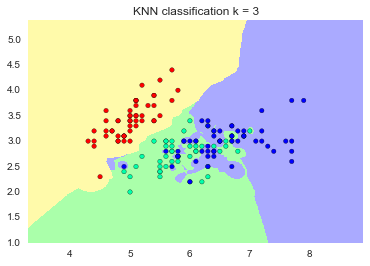

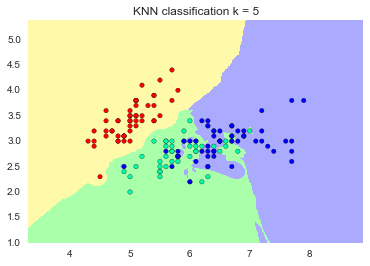

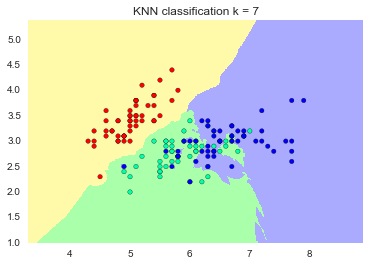

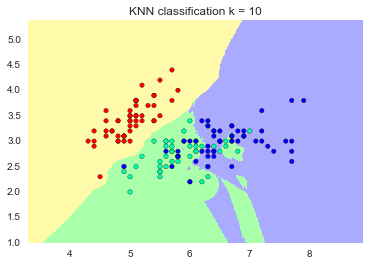

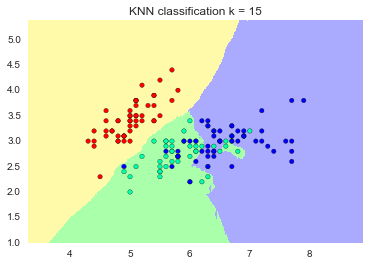

In [32]:
for nb in k_list:
    knn = neighbors.KNeighborsClassifier(nb,weights = 'distance',algorithm = 'auto')
    
    knn.fit(training_data,training_data_label)
    
    test_data_labels = knn.predict(test_data)
    
    test_data_labels = test_data_labels.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx,yy,test_data_labels,cmap = cmap_light)

    plt.scatter(training_data[:,0],training_data[:,1],c = training_data_label,cmap = cmap_bold)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())
    plt.title('KNN classification k = '+'{:d}'.format(nb))
    plt.plot()

In [26]:
test_data_labels

array([0, 0, 0, ..., 2, 2, 2])

In [38]:
training_data = [[10],[11],[12],[30],[40],[88]]

In [39]:
training_response = [0.,0.,0.14,1.0,1.1,1.5]

In [40]:
knn= KNeighborsRegressor(n_neighbors = 3)
knn.fit(training_data,training_response)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [41]:
test_data = [[57.27],[20.88]]
test_data_response = knn.predict(test_data)

In [42]:
test_data_response 

array([ 1.2 ,  0.38])

## Support Vector Machine

In [1]:
from sklearn import svm
import time

In [2]:
x = [[0,0],[-2,0],[1,1],[10,1]]

In [4]:
y = [0,0,1,1]
clf = svm.SVC()

In [6]:
clf.fit(x,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [8]:
predict_label = clf.predict([[2.5,8.]])

In [9]:
predict_label

array([1])

In [10]:
clf ### gamma is anto then it is set as 1/n where n is number of training points

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### four models of svm

In [12]:
clf_linear = svm.SVC(kernel = 'linear')
clf_linear.fit(x,y)
predict_label_linear = clf_linear.predict([[2.5,8.]])
predict_label_linear

array([1])

In [14]:
clf_poly = svm.SVC(kernel = "poly")
clf_poly.fit(x,y)
predict_label_poly = clf_poly.predict([[2.5,8.]])
predict_label_poly

array([1])

In [15]:
clf_sigmoid = svm.SVC(kernel = "sigmoid")
clf_sigmoid.fit(x,y)
predict_label_sigmoid = clf_sigmoid.predict([[2.5,8.]])
predict_label_sigmoid

array([1])

In [18]:
import numpy as np
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn import svm

In [19]:
iris = datasets.load_iris()
data = iris.data
label = iris.target

In [20]:
data.shape

(150, 4)

In [21]:
test_percentage = 0.3
training_data,test_data, training_data_label, test_data_label = train_test_split(data, label, test_size = test_percentage, random_state = 42)

In [22]:
len(training_data)

105

In [23]:
N= 7
training_data[0:N]

array([[ 5.5,  2.4,  3.7,  1. ],
       [ 6.3,  2.8,  5.1,  1.5],
       [ 6.4,  3.1,  5.5,  1.8],
       [ 6.6,  3. ,  4.4,  1.4],
       [ 7.2,  3.6,  6.1,  2.5],
       [ 5.7,  2.9,  4.2,  1.3],
       [ 7.6,  3. ,  6.6,  2.1]])

In [24]:
training_data_label[0:N]

array([1, 2, 2, 1, 2, 1, 2])

In [26]:
svm_learning_machine = svm.SVC(kernel = 'rbf',tol = 0.0001, gamma = 0.5, C=1)
svm_learning_machine.fit(training_data, training_data_label)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.0001, verbose=False)

In [28]:
predicted_test_data_label = svm_learning_machine.predict(test_data)

In [29]:
predicted_test_data_label 

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0])

In [30]:
test_data_label

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0])

In [31]:
learning_accuracy = svm_learning_machine.score(test_data, test_data_label)
learning_accuracy

1.0

### sensitivity is TF/(TF+FN)
### specificity  = TN/(TN+fp)

In [38]:
class compute_measure(predicted_label, true_label):
    
    def __init__(self,predicte_label, true_label):
        
        self.predict_label = predicted_label
        self.true_label = true_label
        TP = len([i for i in zip(true_label, predicted_label) if (i[0] == i[1]) and i[0] == 1])
        TN = len([i for i in zip(true_label, predicted_label) if (i[0] == i[1]) and i[0] == 0])
        FP = len([i for i in zip(true_label, predicted_label) if (i[0] != i[1]) and i[0] == 1])
        FN = len([i for i in zip(true_label, predicted_label) if (i[0] != i[1]) and i[0] == 0])
        self.tp = TP
        self.tn = TN
        self.fp = FP
        self.fn = FN

    def sensitivity(self):
            
        return self.tf/(self.tf+self.fn)
        
    def specificity(self):
        return self.tn/(self.tn+self.fp)  

NameError: name 'predicted_label' is not defined